<h1><strong>CSCI 4455 &ndash; Fall 2022</strong></h1>

<h2><strong>Assignment 4 - Cluster Analysis</strong></h2>

<h3><strong><span style="color:#cc3300;">Due: December 09, 08:59pm </span></strong></h3>

<h3><strong>Your name: Cody Kelly</strong></h3>

<ul>
<li style="text-align: justify;">Please note that you must do this assignment&nbsp;<span style="color: #cc3300;"><strong><u>individually</u></strong></span>. Using automatic tools, your code will be checked against other submissions and other existing resources (such as websites and books).</li>
<li style="text-align: justify;">Review the lecture notes before starting with this assignment. Then, thoroughly read this document before starting with the implementation or thinking about the solution.</li>
<li style="text-align: justify;">If you have technical questions about Python, please Google the error messages and share the error message alongside the solution that got it fixed on Microsoft Teams, as your classmates may run into the same issues.</li>
<li style="text-align: justify;">Check Canvas regularly for possible clarifications and updates.</li>
<li style="text-align: justify;">There are libraries and scripts for clustering, but you are <span style="color: #cc3300;"><strong>prohibited to use these existing resources</strong></span>, which means you <span style="color: #cc3300;"><strong>cannot include public libraries</strong></span>, or <span style="color: #cc3300;"><strong>modify existing programs</strong></span> since the purpose   of   this   programming   assignment   is   to   help you understand and implement DBScan algorithm. You need to develop your code from scratch.</li>
</ul>


<h2><strong>Assignment Objectives</strong></h2>
<li style="text-align: justify;">1. To implement the <span style="color: #339966;"><strong>DBScan</strong></span> algorithm and test it under different configurations</li>
<li style="text-align: justify;">2. To evaluate the quality of the clusterings</li>
<li style="text-align: justify;">3. To visualize clusterings</li>

<h2>Dataset</h2>

<p style="text-align: justify;">In this assignment, three datasets with different shapes and numbers of clusters are provided. Each dataset contains 1500 samples, and each sample has two dimensions (x and y).
</p>

<h2>Implementation</h2>

<p style="text-align: justify;">Please consider the following in your implementation:<br>
    
<ul>

<li style="text-align: justify;">You are not allowed to use frequent itemset mining libraries and need to implement your code from scratch. However, you are allowed to use Python built-in functions, such as min, max, average, map, apply, reduce, etc. You are allowed to use numpy and matplolib</li>
<li style="text-align: justify;">Ensure that the cells in your Notebook are ordered correctly so that the “run all” option can run all cells without running to dependency issues.</li>
<li style="text-align: justify;">Your code should be self-explanatory. Make sure you add comments and your output files are formatted correctly. You might lose up to 30 points for bad code quality (readability, modularity, comments, efficiency, etc.) and formatting of the output files.</li>
</ul>

</p>

In [5]:
import matplotlib.pyplot as plt
import matplotlib.colors as pltcolors
import numpy as np
import math
import time

dataset_name = 'moons.csv' # dataset_name: this is the dataset name (such as moons.csv). Assume the dataset is located in the same folder as your notebook.
min_points =   [2]         # a list of integers indicating the minimum number of points required in the neighborhood of a core object
epsilons =     [0.01]         # a list of floats for neighborhood radius


<h2>Implement the DBScan  Algorithm (30 Points)</h2>

<p style="text-align: justify;">Implement the DBScan algorithm, as discussed in the lecture notes. You need a function named dbscan that takes three arguments (dataset, epsilon, and min_points) and returns a clustering.
</p>

In [6]:
# write the code here
# you can insert more cells below, if needed
def dbscan(dataset, epsilon, min_points):
    def get_neighborhood(target_point, points):
        return [point for point in points if math.sqrt(((target_point[0] - point[0])**2)+((target_point[1] - point[1])**2)) < epsilon and point is not target_point]
    data = np.genfromtxt(dataset, delimiter=',').tolist()
    unvisited = data.copy()
    not_clustered = data.copy()
    clusters = []
    while(len(unvisited) > 0):
        random_point = unvisited.pop(np.random.randint(0, len(unvisited)))
        neighborhood = get_neighborhood(random_point, data)
        if len(neighborhood) >= min_points:
            cluster = [random_point]
            not_clustered.remove(random_point)
            index = 0
            while index < len(neighborhood) - 1:
                point = neighborhood[index]
                if point in unvisited:
                    unvisited.remove(point)
                    child_neighborhood = get_neighborhood(point, data)
                    if len(child_neighborhood) >= min_points:
                        neighborhood += child_neighborhood#[p for p in child_neighborhood if p not in neighborhood]
                if point in not_clustered:
                    cluster.append(point)
                    not_clustered.remove(point)
                index += 1
            clusters.append(cluster)
    return clusters, not_clustered
            
clusters, not_clustered = dbscan(dataset_name, .085, 30)

<h2>Clustering Visualization (10 Points)</h2>

<p style="text-align: justify;">Use matplotlib to visualize the cluster. Distinguish each cluster with a different color. Use black to display the outlier points.
</p>


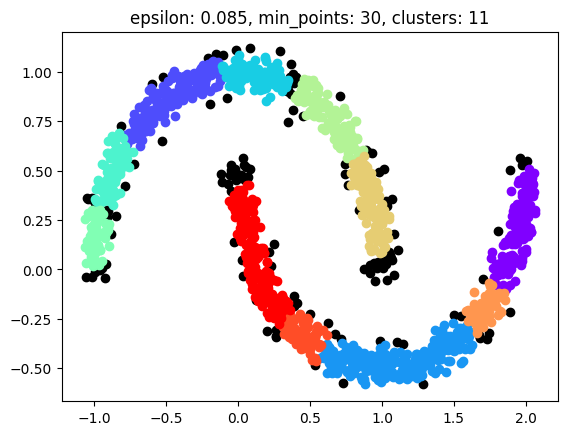

In [14]:
# write the code to implement and find maximal itemsets here
# you can insert more cells below, if needed
index = 0
colors = iter(plt.cm.rainbow(np.linspace(0, 1, len(clusters))))
plt.title(f"epsilon: {0.085}, min_points: {30}, clusters: {len(clusters)}")
for point in not_clustered:
    plt.scatter(point[0], point[1], color='k')
for cluster in clusters:
  # print (cluster)
  c = next(colors)
  for point in cluster:
    plt.scatter(point[0], point[1], color=c)

plt.show()

<h2>Clustering Evaluation and Parameter Tuning (45 Points)</h2>


<p style="text-align: justify;"><b>Evaluation metric:</b> implement the silhouette measure from scratch to evaluate quality of each clustering. Use the formula provided in <a href=https://en.wikipedia.org/wiki/Silhouette_(clustering)>here</a>  </p>

<p style="text-align: justify;"><b>Parameters tuning:</b> run your code with the provided parameter sets for each dataset. For each dataset, visualize the resulting clusterings for each parameter set. The title of each chart should follow this format:</p>

<p style="text-align: justify;">epsilon: value, min_points: value, k: value, silhouette: value (round to two decimal points)

<p style="text-align: justify;">Here is a sample chart from the moons dataset (note that we used a slightly different dataset so you may get a different clustering for this set of parameters).
</p>
<picture>
  <img src="Picture1.png" alt="moons" style="width:auto;">
</picture>

<p style="text-align: justify;">Plots should be generated in the increasing order of epsilons and then min_ponts, i.e.:</p>

    for epsilon in epsilons:
        for min_point in min_points:
            # generate clustering for epsilon and min_points and visualize

<p style="text-align: justify;">Note that your code has to visualize the clusterings only for one dataset at a time. This includes 9-12 plots (based on the possible combinations for the provided epsilon and min_points values for the given dataset) as explained above and 1 silhouette plot as follows (10-13 plots total):</p>

    •	x-axis: k (for k>=2)
    •	y-axis: silhouette scores
    •	title: dataset name

<p style="text-align: justify;">For example, in the below synthetic plot, there are three different clusterings for k=2, two clusterings for k=3, and four clusterings for k=4.</p>
<picture>
  <img src="Picture2.png" alt="synthetic" style="width:auto;">
</picture>

Parameter sets for the circles dataset:

    •	dataset_name = circles.csv'
    •	min_points = [12, 24, 48, 96]
    •	epsilons = [0.1, 0.2, 0.3]

Parameter sets for the aniso dataset:

    •	dataset_name = 'aniso.csv'
    •	min_points = [12, 24, 48, 96]
    •	epsilons = [0.2, 0.3, 0.5]

Parameter sets for the moons dataset:

    •	dataset_name = 'moons.csv'
    •	min_points = [10, 20, 30]
    •	epsilons = [0.07, 0.085, 0.1] 


<p style="text-align: justify;">For each dataset:</p>

<ul>
<li style="text-align: justify;">Explain what is the best number of clusters (k) based on the plots?</li>
<li style="text-align: justify;">Interpret the Silhouette plot. Does the Silhouette plot suggest the same k? Why?</li>
</ul>

In [8]:
# write the code to implement and Clustering Evaluation and Parameter Tuning here
# you can insert more cells below, if needed

<h2>Perceptual questions (15 Points)</h2>

<p style="text-align: justify;">1. Why do we use DBScan instead of Kmeans for these datasets?
</p>
<p style="text-align: justify;">2. What is the complexity of the DBScan algorithm?
</p>
<p style="text-align: justify;">3. Can you decide on the existence of outliers based on the Silhouette measures?
</p>


Put your answers here.

<h2>Submission</h2>

<p style="text-align: justify;">You need to submit a Jupyter Notebook (*.ipynb) file that contains your completed code. This notebook must generate the plots mentioned in Clustering Evaluation and Parameter Tuning.

    
<span style="background-color: #ffff99;">The file name should be in <strong>FirstName_LastName</strong> format</span>.</p>
<p style="text-align: justify;"><span style="background-color: #ffff99;">DO NOT INCLUDE EXTRA FILES, SUCH AS THE INPUT DATASETS</span>, in your submission;</p>
<p style="text-align: justify;">Please download your assignment after submission and make sure it is not corrupted or empty! We will not be responsible for corrupted submissions and will not take a resubmission after the deadline.</p>

<h2>Need Help?</h2>
<p>If you need help with this assignment, please get in touch with TAs on MS Teams or via their emails, or go to their office hours.</p>
<p>You are highly encouraged to ask your question on the designated channel for Assignment 4 on Microsoft Teams (not necessarily monitored by the instructor/TAs). Feel free to help other students with general questions. However, DO NOT share your solution.</p>